# Garantia de aprendizagem e Overfitting
    Garantia de aprendizagem e overfitting são dois conceitos fundamentais em modelos de classificação na aprendizagem de máquina, representando dois lados de uma mesma moeda.

    A garantia de aprendizagem foca na capacidade do modelo de generalizar bem, ou seja, de aplicar o que aprendeu com os dados de treinamento para prever ou classificar dados novos e desconhecidos de forma eficaz. Um modelo com boa garantia de aprendizagem é capaz de identificar e aprender padrões verdadeiramente representativos dos dados, sem ser influenciado por peculiaridades ou ruídos específicos do conjunto de treinamento.

    Por outro lado, overfitting ocorre quando um modelo aprende demais dos dados de treinamento, incluindo ruídos e detalhes que não são representativos do conjunto de dados geral. Isso leva a uma performance excepcional nos dados de treinamento, mas a resultados pobres em dados novos, pois o modelo falha em generalizar o que aprendeu.

    Portanto, o desafio na construção de modelos de classificação eficazes é encontrar um equilíbrio entre garantir uma aprendizagem suficiente para capturar as tendências principais dos dados e, ao mesmo tempo, evitar o overfitting que restringe a capacidade do modelo de se adaptar a novas informações. Este equilíbrio é frequentemente alcançado através de técnicas como validação cruzada, regularização, e escolhendo a complexidade do modelo apropriada para a quantidade e variedade de dados disponíveis.
    

    Neste projeto usei dados sintéticos e procurei de forma simples e didatica exemplificar os conecitos acima mencionados.

In [1]:
import pandas                            as pd
import numpy                             as np

from   sklearn    import datasets        as ds
from   sklearn    import model_selection as ms
from   sklearn    import tree            as tr
from   sklearn    import metrics         as mt
from   matplotlib import pyplot          as plt

In [2]:
#Gerando dados sinteticos
#Generating Synthetic Data

n_samples = 20000
n_features = 2
n_informative = 2
n_redundant= 0
random_state = 42

#dataset
X,y = ds.make_classification(n_samples = n_samples,
                    n_features= n_features,
                    n_informative= n_informative,
                    n_redundant= n_redundant,
                    random_state=random_state
                    )

# Dados de produção, serão os "dados novos"
# production dataset
X, X_prod,y, y_prod = ms.train_test_split(X, y, test_size=0.2, random_state=random_state)

In [3]:
X.shape

(16000, 2)

In [50]:
# Treinando e medindo a precisão de um modelo com os mesmos dados:
# Training and calculating the precision of a model using the same data:

model = tr.DecisionTreeClassifier(max_depth=38) # Parametro escolhido de forma aleatória
model.fit(X,y)


yhat = model.predict(X)
acc = mt.accuracy_score(y, yhat)
print('Accuracy of model on train data is {}'.format(acc)) # O modelo acertou 100% dos dados

yhat_prod = model.predict(X_prod)
acc_prod = mt.accuracy_score(y_prod, yhat_prod)
print('Accuracy of model on new data is {}'.format(acc_prod))

Accuracy of model on train data is 1.0
Accuracy of model on new data is 0.8785


## Estrategy Train - Test

&emsp;Existe uma estratégia para medir a capacidade de generalização de um algoritmo de Machine Learning do que colocá-lo diretamente em Produção.
&emsp;Essa estratégia consiste em separar um conjunto de dados em 2 subconjuntos:Treinamento e Teste.
A separação dos dados em conjunto de treinamento e teste deve ser feita de
maneira aleatória, mantendo a proporção original dos exemplos entre as
classes. Por exemplo:
1. Conjunto de dados original ( 100% dos dados )
a. 25 colunas e 10.000 linhas
b. 60% classe A e 40% classe B
2. Conjunto de dados de treino ( 70% dos dados originais )
a. 25 colunas e 7.000 linhas
b. 60% classe A e 40% classe B
3. Conjunto de dados de validação ( 15% dos dados originais )
a. 25 colunas e 1.500 linhas
b. 60% classe A e 40% classe B
4. Conjunto de dados de teste ( 15% dos dados originais )
a. 25 colunas e 1.500 linhas
b. 60% classe A e 40% classe B


&emsp;There is a strategy for measuring the generalization ability of a Machine Learning algorithm other than putting it directly into production.
This strategy involves dividing a dataset into two subsets: Training and Testing.
The separation of the data into training and test sets should be done randomly, maintaining the original proportion of examples among the classes. For example:

1. Original dataset (100% of the data)
a. 25 columns and 10,000 rows
b. 60% class A and 40% class B
2. Training dataset (70% of the original data)
a. 25 columns and 7,000 rows
b. 60% class A and 40% class B
3. Validation dataset (15% of the original data)
a. 25 columns and 1,500 rows
b. 60% class A and 40% class B
4. Test dataset (15% of the original data)
a. 25 columns and 1,500 rows
b. 60% class A and 40% class B

In [17]:
#Separando treino e teste
X_train,x_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2,random_state=random_state)

In [27]:
# Modelo treinado com os dados de treinamento
# Parametro escolhido de forma aleatoria
model = tr.DecisionTreeClassifier(max_depth=38)
model.fit(X_train,y_train)

#classificação sobre os dados de teste
yhat_test = model.predict(x_test)
acc_test = mt.accuracy_score(y_test,yhat_test)
print(f"Acuracy over test: {acc_test:.3f}")

Acuracy over test: 0.879


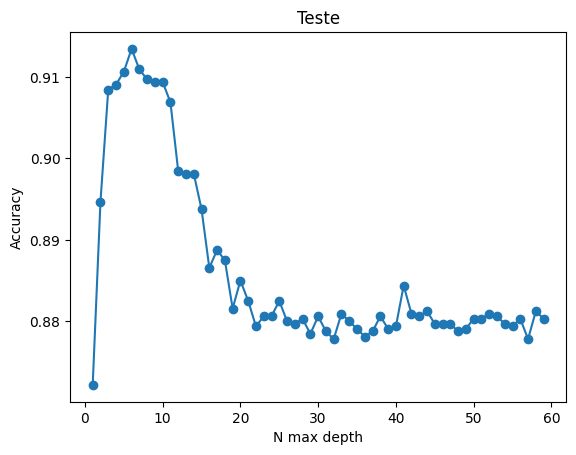

In [28]:
#tuning
values = [i for i in range(1,60)]
test_score = list()
for i in values:
    model = tr.DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)
    
    # classificação sobre o teste
    yhat_test = model.predict(x_test)
    acc_test = mt.accuracy_score(y_test,yhat_test)
    test_score.append(acc_test)
plt.plot(values, test_score, '-o', label = 'test');
plt.xlabel('N max depth')
plt.ylabel('Accuracy')
plt.title('Teste');

In [20]:
# Treinar um novo modelo com os parametros que melhor desempenharam com o conjunto de dados de treino
# Juntar todos os dados possiveis
# Avaliar o modelo com os dados de produção
# trained model
model_last = tr.DecisionTreeClassifier(max_depth=6)
model_last.fit(np.concatenate((X_train,x_test)), 
               np.concatenate((y_train,y_test)))
yhat_prod = model_last.predict(X_prod)
acc_prod = mt.accuracy_score(y_prod,yhat_prod)
print('Accuracy of model on test data is {}'.format(acc_test))
print('Accuracy of model on new data is {}'.format(acc_prod))

Accuracy of model on test data is 0.8790625
Accuracy of model on new data is 0.914


O problema da divisão treino-teste na escolha de parâmetros é que se os parâmetros são ajustados com base nos dados de teste, 
ocorre um vazamento de dados. Isso compromete a avaliação imparcial do modelo, 
 pois ele é otimizado para funcionar bem nos dados de teste específicos,
 e não necessariamente em dados novos. Para evitar isso,
 é melhor usar um conjunto de validação separado para ajustar os parâmetros, 
mantendo o conjunto de teste para a avaliação final.

   The issue with the train-test split in parameter selection is that if parameters 
 are adjusted based on test data, it leads to data leakage. 
 This compromises the impartial evaluation of the model, as it is optimized 
 to perform well on the specific test data, and not necessarily on new data. 
 To avoid this, it's better to use a separate validation set for parameter tuning, 
 keeping the test set for the final evaluation.

## Train - Test - Validation

A separação dos dados em conjunto de treinamento, teste e validação deve ser feita de
maneira aleatória, mantendo a proporção original dos exemplos entre as
classes. Por exemplo:
1. Conjunto de dados original ( 100% dos dados )
a. 25 colunas e 10.000 linhas
b. 60% classe A e 40% classe B
2. Conjunto de dados de treino ( 70% dos dados originais )
a. 25 colunas e 7.000 linhas
b. 60% classe A e 40% classe B
3. Conjunto de dados de validação ( 15% dos dados originais )
a. 25 colunas e 1.500 linhas
b. 60% classe A e 40% classe B
4. Conjunto de dados de teste ( 15% dos dados originais )
a. 25 colunas e 1.500 linhas
b. 60% classe A e 40% classe B

The division of data into training, testing, and validation sets should be done randomly, while maintaining the original proportion of examples among the classes. For example:

1. Original dataset (100% of the data)
a. 25 columns and 10,000 rows
b. 60% class A and 40% class B
2. Training dataset (70% of the original data)
a. 25 columns and 7,000 rows
b. 60% class A and 40% class B
3. Validation dataset (15% of the original data)
a. 25 columns and 1,500 rows
b. 60% class A and 40% class B
4. Testing dataset (15% of the original data)
a. 25 columns and 1,500 rows
b. 60% class A and 40% class B


In [35]:
X_train,x_val, y_train, y_val = ms.train_test_split(X_train,y_train, test_size= 0.2)

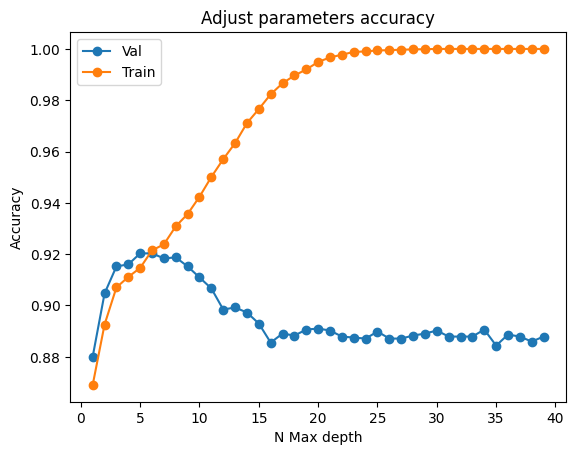

In [41]:
#tuning
values = [i for i in range(1,40)]
train_score, val_score = list(), list()
for i in values:
    model = tr.DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)  
    yhat_train = model.predict(X_train)
    yhat_val = model.predict(x_val)
    acc_train = mt.accuracy_score(y_train,yhat_train)
    acc_val = mt.accuracy_score(y_val,yhat_val)
    train_score.append(acc_train)
    val_score.append(acc_val)
    
plt.plot(values, val_score, '-o', label = 'Val');
plt.plot(values, train_score, '-o', label = 'Train')
plt.xlabel('N Max depth')
plt.ylabel('Accuracy')
plt.title('Adjust parameters accuracy')
plt.legend()
plt.show()

"Este gráfico serve como um exemplo didático para demonstrar a relação entre a Max depth (profundidade da árvore de decisão) e a acurácia do modelo em dois conjuntos de dados: treinamento e validação. À medida que a profundidade da árvore aumenta, nota-se que a acurácia nos dados de treinamento permanece alta ou até melhora, indicando um bom ajuste do modelo a esses dados. Por outro lado, a acurácia nos dados de validação começa a cair após um certo ponto, revelando uma divergência entre os dois conjuntos. Este padrão é um sintoma clássico de "overfitting", onde o modelo se torna excessivamente especializado nos dados de treino, perdendo a capacidade de generalizar para novos dados. É importante destacar que este é um exemplo simplificado para fins didaticos. Na prática, o modelo em questão possui múltiplos parâmetros que podem afetar seu desempenho e que precisam ser considerados em conjunto para evitar o sobreajuste e garantir uma generalização eficaz."


"This graph serves as a didactic example to demonstrate the relationship between the Max depth (decision tree depth) and the accuracy of the model on two data sets: training and validation. As the depth of the tree increases, it is noted that the accuracy in the training data remains high or even improves, indicating a good fit of the model to these data. On the other hand, the accuracy in the validation data begins to fall after a certain point, revealing a divergence between the two sets. This pattern is a classic symptom of 'overfitting', where the model becomes overly specialized in the training data, losing the ability to generalize to new data. It is important to highlight that this is a simplified example for educational purposes. In practice, the model in question has multiple parameters that can affect its performance and that need to be considered together to avoid overfitting and ensure effective generalization."


In [42]:
model = tr.DecisionTreeClassifier( max_depth = 5 )
model.fit(X_train, y_train)
yhat_val = model.predict(x_val)
acc_val = mt.accuracy_score(y_val,yhat_val)
print(f"Accuracy over vailation {acc_val}")

Accuracy over vailation 0.9203125


In [45]:
#model trained with train + test
model_last = tr.DecisionTreeClassifier(max_depth=5)
model_last.fit(np.concatenate((X_train,x_val)),
               np.concatenate((y_train,y_val)))
yhat_test = model_last.predict(x_test)
acc_test = mt.accuracy_score(y_test,yhat_test)
print(f"Accuracy over test {acc_test}")

Accuracy over test 0.910625


In [46]:
yhat_prod = model_last.predict(X_prod)
acc_prod = mt.accuracy_score(y_prod,yhat_prod)
print('Accuracy of model on new data is {}'.format(acc_prod))

Accuracy of model on new data is 0.91


In [47]:
print('Accuracy of model on validations data is {}'.format(acc_val))
print('Accuracy of model on test data is {}'.format(acc_test))
print('Accuracy of model on new data is {}'.format(acc_prod))

Accuracy of model on validations data is 0.9203125
Accuracy of model on test data is 0.910625
Accuracy of model on new data is 0.91
